# ML Course 4 - Practice (multiple and polynomial regressions)

## Subject

We will use here the same data set as for practice #3.

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
826,2014,MITSUBISHI,OUTLANDER,SUV - SMALL,2.4,4,AV6,X,9.5,7.5,8.6,33,198
740,2014,MERCEDES-BENZ,E 300 4MATIC,MID-SIZE,3.5,6,AS7,Z,11.8,8.2,10.2,28,235
203,2014,CHEVROLET,CRUZE ECO,MID-SIZE,1.4,4,M6,X,8.4,5.6,7.1,40,163
551,2014,JAGUAR,XF 3.0L AWD,MID-SIZE,3.0,6,AS8,Z,14.7,9.1,12.2,23,281
903,2014,PORSCHE,PANAMERA 4S,FULL-SIZE,3.0,6,AM7,Z,13.4,8.8,11.3,25,260
893,2014,PORSCHE,CAYENNE GTS,SUV - STANDARD,4.8,8,A8,Z,15.9,11.4,13.9,20,320


* Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'. What do these plots tell you about your capacity to model C02 emissions with a multiple regression model based on the three features?

* Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?

* Assess the performance of your model. What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?

* 'FUELCONSUMPTION_CITY' is the urban consumption while FUELCONSUMPTION_HWY is the consumption on the highway. 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' so to represent a standard driver behaviour. How are these three features correlated between each other?

* Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?

* Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.

## Proposition of correction

* Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'. What do these plots tell you about your capacity to model C02 emissions with a multiple regression model based on the three features?

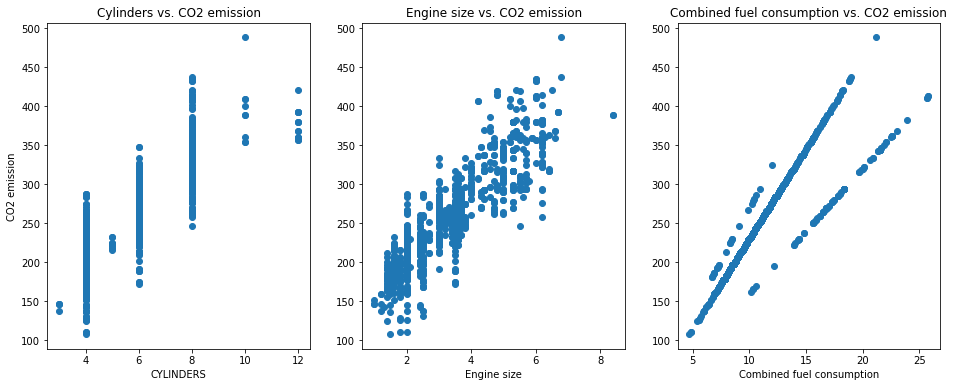

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].scatter(data['CYLINDERS'], data['CO2EMISSIONS'])
axes[0].set_title("Cylinders vs. CO2 emission")
axes[0].set_xlabel("CYLINDERS")
axes[0].set_ylabel("CO2 emission")

axes[1].scatter(data['ENGINESIZE'], data['CO2EMISSIONS'])
axes[1].set_title("Engine size vs. CO2 emission")
axes[1].set_xlabel("Engine size")

axes[2].scatter(data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'])
axes[2].set_title("Combined fuel consumption vs. CO2 emission")
axes[2].set_xlabel("Combined fuel consumption")

plt.show()

All three features seem to have a linear relationship with CO2 emissions. All trends indicate a positive correlation.  
The Combined fuel consumption seems to display two distinct linear trends that are very precise. This indicates a possible interaction with another feature that will need to be investigated further.

* Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?

In [5]:
X = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression

reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)
print("The linear model is: Y = {:.3} + {:.3}*CYLINDERS + {:.3}*ENGINESIZE + {:.3}*FUELCONSUMPTION_COMB".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2]))

The linear model is: Y = 68.4 + 7.55*CYLINDERS + 11.9*ENGINESIZE + 9.1*FUELCONSUMPTION_COMB


* Assess the performance of your model. What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def assess_performance(y_true, y_pred):
    print("Mean square error (MSE): %.2f" % mean_squared_error(y_true, y_pred))
    print("Root mean square error (RMSE): %.2f" % mean_squared_error(y_true, y_pred, squared=False))
    print("Mean absolute error (MAE): %.2f" % mean_absolute_error(y_true, y_pred))
    print("R^2 score is: %.2f" % r2_score(y_true, y_pred))

In [9]:
y_pred = reg_multiple.predict(X_test)
assess_performance(y_test, y_pred)

Mean square error (MSE): 595.36
Root mean square error (RMSE): 24.40
Mean absolute error (MAE): 18.14
R^2 score is: 0.85


With FUELCONSUMPTION_COMB as a unique predictor, we had a mean squared error of 792.17. Here, with our three predictors, we get an MSE of 595.36. We have improved our prediction.  
The Mean Absolute Error indicates that the average prediction error shrank from 20.22 to 18.14.  
The $R^2$ score indicates that adding two more features allowed the model to explain 85% of the variance, as opposed to 81% with only one predictor.

* 'FUELCONSUMPTION_CITY' is the urban consumption while FUELCONSUMPTION_HWY is the consumption on the highway. 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' so to represent a standard driver behaviour. How are these three features correlated between each other?

In [10]:
correlation = data[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']].corr()
correlation

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
FUELCONSUMPTION_CITY,1.000000,0.965718,0.995542
FUELCONSUMPTION_HWY,0.965718,1.000000,0.985804
FUELCONSUMPTION_COMB,0.995542,0.985804,1.000000


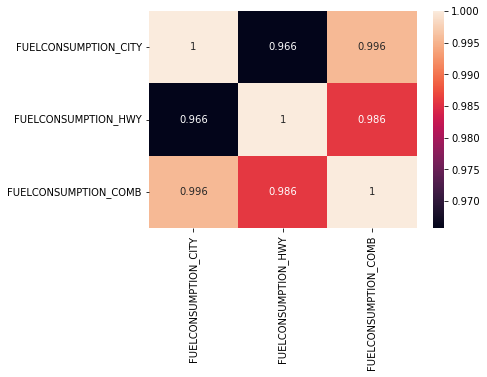

In [11]:
_ = sns.heatmap(correlation, annot=True, fmt='.3g')

These three features are highly correlated between each other. Especially, FUELCONSUMPTION_COMB correlated at more than 98.5 % with FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY.

* Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?

In [12]:
# Data preparation
X_2 = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

# Train-test split
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size = 0.25, random_state = 0)

# Model fit
reg_multiple_2 = LinearRegression()
reg_multiple_2.fit(X_train_2, y_train)

# Model performance
y_pred_2 = reg_multiple_2.predict(X_test_2)
assess_performance(y_test, y_pred_2)

Mean square error (MSE): 597.46
Root mean square error (RMSE): 24.44
Mean absolute error (MAE): 18.14
R^2 score is: 0.85


The metrics are approximately the same as before, that means that there is no significant gain of accuracy when adding FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY as predictors.  
This is due to the fact that these two features are strongly correlated with FUELCONSUMPTION_COMB and do not bring much extra information. Indeed, this latter is a linear combination of the two previous ones. This is called a **multicollinearity**.  

* Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.

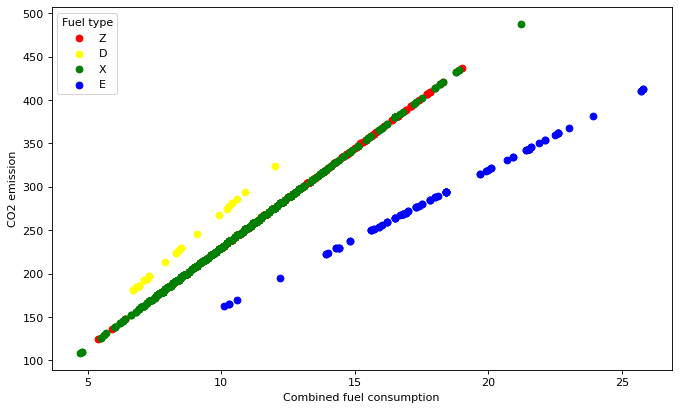

In [13]:
plt.figure(figsize=(10,6), dpi= 80)

plt.scatter(data[data['FUELTYPE']=='Z']['FUELCONSUMPTION_COMB'], y[data['FUELTYPE']=='Z'], c='red', label='Z')
plt.scatter(data[data['FUELTYPE']=='D']['FUELCONSUMPTION_COMB'], y[data['FUELTYPE']=='D'], c='yellow', label='D')
plt.scatter(data[data['FUELTYPE']=='X']['FUELCONSUMPTION_COMB'], y[data['FUELTYPE']=='X'], c='green', label='X')
plt.scatter(data[data['FUELTYPE']=='E']['FUELCONSUMPTION_COMB'], y[data['FUELTYPE']=='E'], c='blue', label='E')

plt.xlabel("Combined fuel consumption")
plt.ylabel("CO2 emission")
plt.legend(loc='upper left', title='Fuel type')
plt.show()

Alternative code:

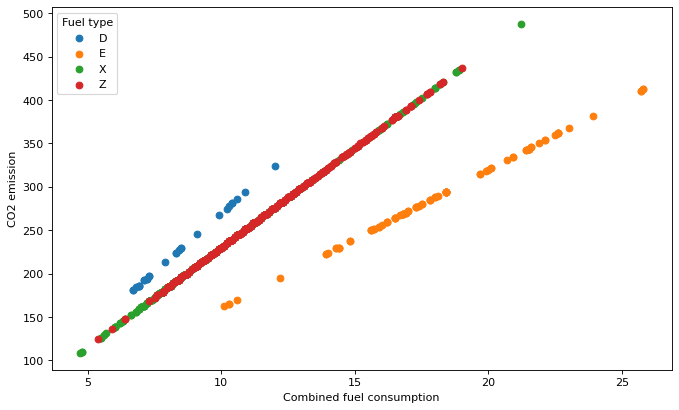

In [14]:
plt.figure(figsize=(10,6), dpi= 80)

for group_name, group in data[['CO2EMISSIONS',  'FUELCONSUMPTION_COMB','FUELTYPE']].groupby('FUELTYPE'):
    plt.scatter(group["FUELCONSUMPTION_COMB"], group["CO2EMISSIONS"], label=group_name)

plt.xlabel("Combined fuel consumption")
plt.ylabel("CO2 emission")
plt.legend(loc='upper left', title='Fuel type')
plt.show()

The graph CO2 emission vs. combined fuel consumption seems to be composed of one line for each fuel type (Z and X are superposed though). It appears that FUELCONSUMPTION_COMB and FUELTYPE are probably sufficient and very good predictors for CO2EMISSION.

In [22]:
# Data preparation
X_3 = data[['FUELTYPE','FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

# Data encoding
X_3 = pd.get_dummies(X_3, columns=['FUELTYPE'], prefix=['FUELTYPE_is'])

# Train-test split
X_train_3, X_test_3, y_train, y_test = train_test_split(X_3, y, test_size = 0.25, random_state = 0)

# Model fit
reg_multiple_3 = LinearRegression()
reg_multiple_3.fit(X_train_3, y_train)

# Model accuracy
y_pred_3 = reg_multiple_3.predict(X_test_3)
assess_performance(y_test, y_pred_3)

Mean square error (MSE): 51.45
Root mean square error (RMSE): 7.17
Mean absolute error (MAE): 3.41
R^2 score is: 0.99


With this model, the MSE has decreased from 597.46 to 51.45. It means that we have significatively increased the performance of the model.  
A more interpretable measure is the MAE, which has fallen from 18.14 to 3.41. This is very small for a target variable that has a mean of 255.  
Finally, the $R^2$ score shows that the new model now explains 99% of the variance.

# Going further 
### Interpreting the model

In [24]:
feature_names
def show_coefficients(model, feature_names=None):
    coefs = np.hstack([model.intercept_, model.coef_.squeeze()])
    feature_names = model.feature_names_in_.tolist() if feature_names is None else feature_names.tolist()  
    feature_names = ['Intercept'] + feature_names
    return pd.DataFrame(coefs, index=feature_names, columns=['coefficient'])

show_coefficients(reg_multiple_3)

AttributeError: 'LinearRegression' object has no attribute 'feature_names'

In [25]:
reg_multiple_3.feature_names_in_

AttributeError: 'LinearRegression' object has no attribute 'feature_names_in_'

# Adding interaction ploynomial features

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Data preparation
X_4 = data[['FUELTYPE','FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

# Data encoding
X_4 = pd.get_dummies(X_4, columns=['FUELTYPE'], prefix=['FUELTYPE_is'])
X_4['FUELTYPE_is_XZ'] = X_4['FUELTYPE_is_X'] | X_4['FUELTYPE_is_Z']
X_4 = X_4.drop(['FUELTYPE_is_X', 'FUELTYPE_is_Z'], axis='columns')
poly_4 = PolynomialFeatures(degree=2, include_bias=False)
X_4 = poly_4.fit_transform(X_4)

# Train-test split
X_train_4, X_test_4, y_train, y_test = train_test_split(X_4, y, test_size = 0.25, random_state = 0)

# Model fit
reg_multiple_4 = LinearRegression()
reg_multiple_4.fit(X_train_4, y_train)

# Model accuracy
y_pred_4 = reg_multiple_4.predict(X_test_4)
assess_performance(y_test, y_pred_4)

Mean square error (MSE): 0.09
Root mean square error (RMSE): 0.30
Mean absolute error (MAE): 0.25
R^2 score is: 1.00


In [28]:
show_coefficients(reg_multiple_4, feature_names=poly_4.get_feature_names())

AttributeError: 'list' object has no attribute 'tolist'

## With only interaction terms

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Data preparation
X_5 = data[['FUELTYPE','FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

# Data encoding
X_5 = pd.get_dummies(X_5, columns=['FUELTYPE'], prefix=['FUELTYPE_is'])
X_5['FUELTYPE_is_XZ'] = X_5['FUELTYPE_is_X'] | X_5['FUELTYPE_is_Z']
X_5 = X_5.drop(['FUELTYPE_is_X', 'FUELTYPE_is_Z'], axis='columns')
poly_5 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_5 = poly_5.fit_transform(X_5)

# Train-test split
X_train_5, X_test_5, y_train, y_test = train_test_split(X_5, y, test_size = 0.25, random_state = 0)

# Model fit
reg_multiple_5 = Ridge()
reg_multiple_5.fit(X_train_5, y_train)

# Model accuracy
y_pred_5 = reg_multiple_5.predict(X_test_5)
assess_performance(y_test, y_pred_5)

Mean square error (MSE): 0.09
Root mean square error (RMSE): 0.30
Mean absolute error (MAE): 0.25
R^2 score is: 1.00


In [31]:
show_coefficients(reg_multiple_5, feature_names=poly_5.get_feature_names())

AttributeError: 'list' object has no attribute 'tolist'